11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.9023 - loss: 0.3209 - val_accuracy: 0.9854 - val_loss: 0.0454
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9852 - loss: 0.0461 - val_accuracy: 0.9889 - val_loss: 0.0343
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9902 - loss: 0.0293 - val_accuracy: 0.9860 - val_loss: 0.0426
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9939 - loss: 0.0198 - val_accuracy: 0.9888 - val_loss: 0.0371
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9902 - val_loss: 0.0328
313/313 - 2s - 6ms/step - accuracy: 0.9902 - loss: 0.0328
Test Accuracy: 0.9902, Test Loss: 0.0328


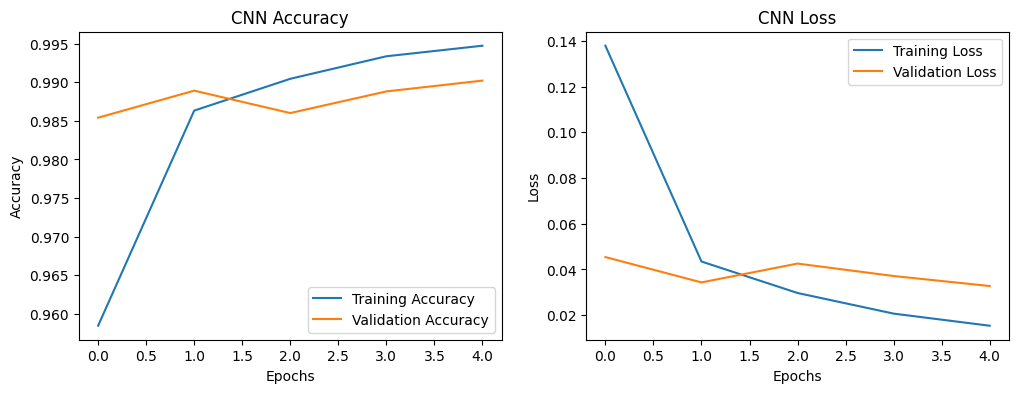

Run the following command in the terminal to launch TensorBoard:
tensorboard --logdir=logs/fit/


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import datetime

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions for CNN input
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Define a simple CNN model
def create_cnn_model():
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Setup TensorBoard logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train and evaluate the CNN model
def train_cnn_model():
    model = create_cnn_model()
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), 
                        callbacks=[tensorboard_callback], verbose=1)
    return model, history

# Train CNN model
cnn_model, cnn_history = train_cnn_model()

# Evaluate performance
test_loss, test_acc = cnn_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Accuracy')

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Loss')

plt.show()

# Instructions to launch TensorBoard
print("Run the following command in the terminal to launch TensorBoard:")
print("tensorboard --logdir=logs/fit/")


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Resize images to fit AlexNet (227x227)
x_train = tf.image.resize(x_train, (227, 227))
x_test = tf.image.resize(x_test, (227, 227))

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define AlexNet model for resized CIFAR-10 images
def create_alexnet():
    model = keras.Sequential([
        layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Setup TensorBoard logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train AlexNet model
def train_alexnet():
    model = create_alexnet()
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), 
                        callbacks=[tensorboard_callback], verbose=1)
    return model, history

# Train AlexNet model
alexnet_model, alexnet_history = train_alexnet()

# Evaluate performance
test_loss, test_acc = alexnet_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Generate classification report
y_pred = np.argmax(alexnet_model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(alexnet_history.history['accuracy'], label='Training Accuracy')
plt.plot(alexnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('AlexNet Accuracy')

plt.subplot(1, 2, 2)
plt.plot(alexnet_history.history['loss'], label='Training Loss')
plt.plot(alexnet_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('AlexNet Loss')

plt.show()

# Explanation of large kernel sizes in AlexNet
print("\nWhy did AlexNet use large kernel sizes (e.g., 11×11 in CONV1)?")
print("AlexNet used large 11×11 kernels in the first convolutional layer to capture low-level features across a larger receptive field. This was crucial at the time due to the lack of deep networks and small dataset sizes. The large kernel helped extract spatially distributed patterns and reduce dimensionality efficiently in early layers. However, modern architectures now prefer smaller kernels (e.g., 3×3) for better parameter efficiency and deeper representations.")

# Instructions to launch TensorBoard
print("Run the following command in the terminal to launch TensorBoard:")
print("tensorboard --logdir=logs/fit/")
